# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [197]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load files and edit datasets

LAM output analysis.

Simu irr et simu no-irr.

In [199]:
# lon_min=-10
# lon_max=4
# lat_min=34
# lat_max=46

In [200]:
noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/noirr'
irr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/irr'

## LMDZ

In [201]:
filename = '{}/*/ATM/MO/*.nc'.format(irr_dir)

lmdz_full = xr.open_mfdataset(filename)
lmdz_full = lmdz_full.rename({'time_counter':'time'})
lmdz_full.attrs['name'] = 'no_irr'
lmdz_full = lmdz_full.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))
lmdz_full

<xarray.Dataset>
Dimensions:               (lat: 35, lon: 49, presnivs: 79, time: 156,
                           axis_nbounds: 2)
Coordinates:
  * lat                   (lat) float32 35.69 35.93 36.17 ... 43.38 43.62 43.87
  * lon                   (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-...
    time_instant          (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/80)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    phis                  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    aire                  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    contfracATM           (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                    ...
    vitv                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    vitw                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    temp                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    ovap                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    geoph                 (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    pres                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 17:20:19 GMT
    uuid:         9b14cf09-a875-4aee-8765-fef8fb231424

In [202]:
LMDZ_TS=True

In [203]:
#open histmth files
if LMDZ_TS:
    filename = '{}/*/ATM/TS_MO/*.nc'.format(noirr_dir)
    # filename = '{}/ATM/TS_MO*.nc'.format(noirr_dir)
else:
    filename = '{}/*/ATM/MO/*.nc'.format(noirr_dir)

lmdz_noirr0 = xr.open_mfdataset(filename)
lmdz_noirr = lmdz_noirr0.rename({'time_counter':'time'})
lmdz_noirr.attrs['name'] = 'no_irr'
lmdz_noirr.attrs['plot_color']='red'
lmdz_noirr = lmdz_noirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

lmdz_noirr['evap']=lmdz_noirr['evap'] * 3600 * 24
lmdz_noirr['evap'].attrs['units']='mm/d'
lmdz_noirr['evap'].attrs['long_name'] = 'Evapotranspiration'

lmdz_noirr['precip']=lmdz_noirr['precip'] * 3600 * 24
lmdz_noirr['precip'].attrs['long_name'] = 'Total precipitation'
lmdz_noirr['precip'].attrs['units']='mm/d'

lmdz_noirr['sens']=lmdz_noirr['sens']
lmdz_noirr['flat']=lmdz_noirr['flat']

lmdz_noirr

<xarray.Dataset>
Dimensions:               (lat: 35, lon: 49, presnivs: 79, time: 156,
                           axis_nbounds: 2)
Coordinates:
  * lat                   (lat) float32 35.69 35.93 36.17 ... 43.38 43.62 43.87
  * lon                   (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-...
Dimensions without coordinates: axis_nbounds
Data variables: (12/28)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    aire                  (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    LWdnSFC               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    LWupSFC               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    SWdnSFC               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    SWupSFC               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    ...                    ...
    snow                  (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    t2m                   (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    u10m                  (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    uq                    (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    v10m                  (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    vq                    (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 17:17:56 GMT
    uuid:         15cc0aab-057e-451b-bf0c-046d80552902
    plot_color:   red

In [204]:
if LMDZ_TS:
    filename = '{}/*/ATM/TS_MO/*.nc'.format(irr_dir)
else:
    filename = '{}/*/ATM/MO/*.nc'.format(irr_dir)

lmdz_irr0 = xr.open_mfdataset(filename)
lmdz_irr =lmdz_irr0.rename({'time_counter':'time'})
lmdz_irr.attrs['name'] = 'irr'
lmdz_irr.attrs['plot_color']='#0C5DA5'
lmdz_irr = lmdz_irr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

lmdz_irr['evap']=lmdz_irr['evap'] * 3600 * 24
lmdz_irr['evap'].attrs['units']='mm/d'
lmdz_irr['precip']=lmdz_irr['precip'] * 3600 * 24
lmdz_irr['precip'].attrs['units']='mm/d'
lmdz_irr['sens']=-lmdz_irr['sens']
lmdz_irr['flat']=-lmdz_irr['flat']

lmdz_irr

<xarray.Dataset>
Dimensions:               (lat: 35, lon: 49, presnivs: 79, time: 156,
                           axis_nbounds: 2)
Coordinates:
  * lat                   (lat) float32 35.69 35.93 36.17 ... 43.38 43.62 43.87
  * lon                   (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-...
Dimensions without coordinates: axis_nbounds
Data variables: (12/28)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    aire                  (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    LWdnSFC               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    LWupSFC               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    SWdnSFC               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    SWupSFC               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    ...                    ...
    snow                  (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    t2m                   (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    u10m                  (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    uq                    (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    v10m                  (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    vq                    (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 17:20:19 GMT
    uuid:         9b14cf09-a875-4aee-8765-fef8fb231424
    plot_color:   #0C5DA5

In [205]:
if LMDZ_TS:
    # drop unused coordinates
    lmdz_noirr = lmdz_noirr.drop_vars('presnivs')
    lmdz_noirr = lmdz_noirr.drop_vars('time_centered')
    lmdz_irr = lmdz_irr.drop_vars('presnivs')
    lmdz_irr = lmdz_irr.drop_vars('time_centered')
    print('using TimeSeries outputs')

else:
    #add var t1 to lmdz datasets (first level of temp)
    lmdz_noirr['t1']    = lmdz_noirr['temp'][:,0,:,:]
    lmdz_noirr['t1'].attrs['long_name'] = 'Temperature at first level'
    lmdz_noirr['t1'].attrs['units']='K'
    
    lmdz_irr['t1']      = lmdz_irr['temp'][:,0,:,:]
    lmdz_irr['t1'].attrs['long_name'] = 'Temperature at first level'
    lmdz_irr['t1'].attrs['units']='K'
    print('using full outputs')

using TimeSeries outputs


## ORCHIDEE

In [206]:
filename = '{}/*/SRF/MO/*history.nc'.format(irr_dir)

orc_full = xr.open_mfdataset(filename)
orc_full = orc_full.rename({'time_counter':'time'})
orc_full.attrs['name'] = 'irr'
orc_full = orc_full.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

orc_full['irrig_frac'] = orc_full['irrigmap_dyn']/orc_full['Areas'] * 100
orc_full['irrig_frac'].attrs['units'] = '%'

orc_full

<xarray.Dataset>
Dimensions:                 (lat: 35, lon: 49, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, snowlev: 3,
                             albtyp: 2, time: 156, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 35.69 35.93 36.17 ... 43.62 43.87
  * lon                     (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2010-01-16T12:00:00 ... 202...
Dimensions without coordinates: axis_nbounds
Data variables: (12/131)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                      ...
    delfastr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 dask.array<chunksize=(1, 2, 35, 49), meta=np.ndarray>
    irrig_frac              (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:54:51 GMT
    uuid:         3b44d854-98f3-4d70-81de-20074bb33431

In [207]:
# filename = '{}/*/SRF/MO/*sechiba_history.nc'.format(noirr_dir)
filename = '{}/*/SRF/TS_MO/*.nc'.format(noirr_dir)

orc_noirr0 = xr.open_mfdataset(filename)
orc_noirr = orc_noirr0.rename({'time_counter':'time'})
orc_noirr.attrs['name'] = 'no_irr'
orc_noirr.attrs['plot_color']='red'
orc_noirr = orc_noirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

orc_noirr['irrig_frac'] = orc_full['irrig_frac']
orc_noirr['irrigation'] = orc_full['irrigation'][:,:,:]

orc_noirr

<xarray.Dataset>
Dimensions:               (lat: 35, lon: 49, time: 156, axis_nbounds: 2,
                           veget: 15, nobio: 1, solth: 18)
Coordinates:
  * lat                   (lat) float32 35.69 35.93 36.17 ... 43.38 43.62 43.87
  * lon                   (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
    time_centered         (time) datetime64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-...
Dimensions without coordinates: axis_nbounds, veget, nobio, solth
Data variables: (12/37)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    Areas                 (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    Contfrac              (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    LAImean               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    alb_nir               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    alb_vis               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    ...                    ...
    transpir              (time, veget, lat, lon) float32 dask.array<chunksize=(60, 15, 35, 49), meta=np.ndarray>
    tsol_max              (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    tsol_min              (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    vegetfrac             (time, veget, lat, lon) float32 dask.array<chunksize=(60, 15, 35, 49), meta=np.ndarray>
    irrig_frac            (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    irrigation            (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:52:37 GMT
    uuid:         58fb7df4-6705-43ed-8adf-55b70a468dac
    plot_color:   red

In [208]:
# filename = '{}/*/SRF/MO/*history.nc'.format(irr_dir)
filename = '{}/*/SRF/TS_MO/*.nc'.format(irr_dir)

orc_irr0 = xr.open_mfdataset(filename)
orc_irr = orc_irr0.rename({'time_counter':'time'})
orc_irr.attrs['name'] = 'irr'
orc_irr.attrs['plot_color']='#0C5DA5'
orc_irr = orc_irr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

orc_irr['irrigation'] = orc_full['irrigation'][:,:,:]
orc_irr['irrig_frac'] = orc_full['irrig_frac']

orc_irr

<xarray.Dataset>
Dimensions:               (lat: 35, lon: 49, time: 156, axis_nbounds: 2,
                           veget: 15, nobio: 1, solth: 18)
Coordinates:
  * lat                   (lat) float32 35.69 35.93 36.17 ... 43.38 43.62 43.87
  * lon                   (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * time                  (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-...
    time_centered         (time) datetime64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, veget, nobio, solth
Data variables: (12/37)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    Areas                 (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    Contfrac              (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    LAImean               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    alb_nir               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    alb_vis               (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    ...                    ...
    transpir              (time, veget, lat, lon) float32 dask.array<chunksize=(156, 15, 35, 49), meta=np.ndarray>
    tsol_max              (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    tsol_min              (time, lat, lon) float32 dask.array<chunksize=(60, 35, 49), meta=np.ndarray>
    vegetfrac             (time, veget, lat, lon) float32 dask.array<chunksize=(156, 15, 35, 49), meta=np.ndarray>
    irrigation            (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    irrig_frac            (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:54:51 GMT
    uuid:         3b44d854-98f3-4d70-81de-20074bb33431
    plot_color:   #0C5DA5

## Period selection

In [209]:
# Select months
months=[6,7,8]
# lmdz_irr =lmdz_irr.sel(time=lmdz_irr['time.month'].isin(months))
# lmdz_noirr = lmdz_noirr.sel(time=lmdz_noirr['time.month'].isin(months))
# lmdz_full = lmdz_full.sel(time=lmdz_full['time.month'].isin(months))

# orc_irr = orc_irr.sel(time=orc_irr['time.month'].isin(months))
# orc_noirr = orc_noirr.sel(time=orc_noirr['time.month'].isin(months))
# orc_full = orc_full.sel(time=orc_full['time.month'].isin(months))

## Masking

### IP continental subdomain

In [210]:
# Define masks
 
con_mask_2D_ORC= orc_full.mean(dim='time')['Contfrac']>0.95
con_mask_2D_ORC.attrs['name']='Continental mask (95%)'

ip_polygon_mask_2D=polygon_to_mask(orc_noirr.mean(dim="time"), iberian_peninsula)
ip_polygon_mask_2D.attrs['name']='Iberian Peninsula polygon mask'

#combine two masks
ip_mask = con_mask_2D_ORC * ip_polygon_mask_2D
ip_mask.attrs['name']='IPmask'

In [211]:
#ORC
# ip_orc_noirr    = orc_noirr.where(con_mask_ORC).where(ip_mask_ORC['mask'])
# ip_orc_irr      = orc_irr.where(con_mask_ORC).where(ip_mask_ORC['mask'])
ip_orc_noirr = apply_2Dmask_to_dataset(orc_noirr, ip_mask, dsname='no_irr')
ip_orc_irr = apply_2Dmask_to_dataset(orc_irr, ip_mask, dsname='irr')

In [212]:
#LMDZ
# ip_lmdz_noirr   = lmdz_noirr.where(con_mask_ORC).where(ip_mask_ORC['mask'])
# ip_lmdz_irr     = lmdz_irr.where(con_mask_ORC).where(ip_mask_ORC['mask'])
ip_lmdz_noirr = apply_2Dmask_to_dataset(lmdz_noirr, ip_mask, dsname='no_irr')
ip_lmdz_irr = apply_2Dmask_to_dataset(lmdz_irr, ip_mask, dsname='irr')

In [213]:
# Full irrsims
# ip_orc_full     = apply_2Dmask_to_dataset(orc_full, ip_mask, dsname='irr')
# ip_lmdz_full    = apply_2Dmask_to_dataset(lmdz_full, ip_mask, dsname='irr')

### Irrigated areas

In [214]:
# Old masks and methods
#create a masks of data points where irrig_frac >5%
# irr_mask = (orc_full['irrigmap_dyn']/orc_full['Areas'])>0.05

#irrigated vs nonirr areas
# irr_orc_noirr=orc_noirr.where(irr_mask)
# irr_orc_irr=orc_irr.where(irr_mask)
# irr_lmdz_noirr=lmdz_noirr.where(irr_mask)
# irr_lmdz_irr=lmdz_irr.where(irr_mask)

# irr_ip_orc_noirr=ip_orc_noirr.where(irr_mask)
# irr_ip_orc_irr=ip_orc_irr.where(irr_mask)
# irr_ip_lmdz_noirr=ip_lmdz_noirr.where(irr_mask)
# irr_ip_lmdz_irr=ip_lmdz_irr.where(irr_mask)

# #non irrigated areas
# nonirr_orc_noirr=orc_noirr.where(~irr_mask)
# nonirr_orc_irr=orc_irr.where(~irr_mask)
# nonirr_lmdz_noirr=lmdz_noirr.where(~irr_mask)
# nonirr_lmdz_irr=lmdz_irr.where(~irr_mask)

# nonirr_ip_orc_noirr=ip_orc_noirr.where(~irr_mask)
# nonirr_ip_orc_irr=ip_orc_irr.where(~irr_mask)
# nonirr_ip_lmdz_noirr=ip_lmdz_noirr.where(~irr_mask)
# nonirr_ip_lmdz_irr=ip_lmdz_irr.where(~irr_mask)

#for both full datasets
# ip_orc_full=orc_full.where(ip_mask_ORC['mask']).where(con_mask_ORC)
# ip_lmdz_full=lmdz_full.where(ip_mask_ORC['mask']).where(con_mask_ORC)
# irr_ip_orc_full=ip_orc_full.where(irr_mask)
# nonirr_ip_orc_full=ip_orc_full.where(~irr_mask)

In [215]:
# Define 2D masks

# Applied irrigation
irr_mask_low    = ip_orc_irr.mean(dim='time')['irrigation']<0.05
irr_mask_high   = ip_orc_irr.mean(dim='time')['irrigation']>0.1
irr_mask_med    = (~irr_mask_low) * (~irr_mask_high)

In [216]:
#irrigated fraction
# irr_mask5   = ip_orc_full.mean(dim='time')['irrig_frac']<5
# irr_mask10  = ip_orc_full.mean(dim='time')['irrig_frac']<10
# irr_mask15  = ip_orc_full.mean(dim='time')['irrig_frac']<15
# irr_mask20  = ip_orc_full.mean(dim='time')['irrig_frac']<20
# irr_mask30  = ip_orc_full.mean(dim='time')['irrig_frac']<30
# irr_mask40  = ip_orc_full.mean(dim='time')['irrig_frac']<40

In [217]:
# Define datasets
lowirr_ip_orc_noirr = apply_2Dmask_to_dataset(ip_orc_noirr, irr_mask_low, dsname='lowirr_noirr')
lowirr_ip_orc_irr = apply_2Dmask_to_dataset(ip_orc_irr, irr_mask_low, dsname='lowirr_irr')

medirr_ip_orc_noirr = apply_2Dmask_to_dataset(ip_orc_noirr, irr_mask_med, dsname='medirr_noirr')
medirr_ip_orc_irr = apply_2Dmask_to_dataset(ip_orc_irr, irr_mask_med, dsname='medirr_irr')

highirr_ip_orc_noirr = apply_2Dmask_to_dataset(ip_orc_noirr, irr_mask_high, dsname='highirr_noirr')
highirr_ip_orc_irr = apply_2Dmask_to_dataset(ip_orc_irr, irr_mask_high, dsname='highirr_irr')

## Mean, difference, and (spatially) aggregated datasets

In [218]:
# ip_orc_noirr_mean=ip_orc_noirr.mean(dim='time')
# ip_orc_noirr_mean.attrs['name']='IP ORC no_irr'
# ip_orc_irr_mean=ip_orc_irr.mean(dim='time')
# ip_orc_irr_mean.attrs['name']='IP ORC irr'
# ip_lmdz_noirr_mean=ip_lmdz_noirr.mean(dim='time')
# ip_lmdz_noirr_mean.attrs['name']='IP LMDZ no_irr'
# ip_lmdz_irr_mean=ip_lmdz_irr.mean(dim='time')
# ip_lmdz_irr_mean.attrs['name']='IP LMDZ irr'

# orc_full_mean=orc_full.mean(dim='time')
# orc_full_mean.attrs['name']='ORC irr'
# lmdz_full_mean=lmdz_full.mean(dim='time')
# lmdz_full_mean.attrs['name']='LMDZ irr'

# ip_orc_full_mean=ip_orc_full.mean(dim='time')
# ip_orc_full_mean.attrs['name']='IP ORC irr'
# ip_lmdz_full_mean=ip_lmdz_full.mean(dim='time')
# ip_lmdz_full_mean.attrs['name']='IP LMDZ irr'

In [219]:
#old aggr datasets
# # ip_orc_full_aggr = ip_orc_full.mean(dim='lon').mean(dim='lat')
# ip_lmdz_full_aggr = ip_lmdz_full.mean(dim='lon').mean(dim='lat')
# ip_orc_irr_aggr = ip_orc_irr.mean(dim='lon').mean(dim='lat')
# ip_lmdz_irr_aggr = ip_lmdz_irr.mean(dim='lon').mean(dim='lat')
# ip_orc_noirr_aggr = ip_orc_noirr.mean(dim='lon').mean(dim='lat')
# ip_lmdz_noirr_aggr = ip_lmdz_noirr.mean(dim='lon').mean(dim='lat')
# ip_orc_diff_aggr = ip_orc_diff.mean(dim='lon').mean(dim='lat')
# ip_lmdz_diff_aggr = ip_lmdz_diff.mean(dim='lon').mean(dim='lat')

# irr_ip_orc_full_aggr = irr_ip_orc_full.mean(dim='lon').mean(dim='lat')
# irr_ip_orc_irr_aggr = irr_ip_orc_irr.mean(dim='lon').mean(dim='lat')
# irr_ip_lmdz_irr_aggr = irr_ip_lmdz_irr.mean(dim='lon').mean(dim='lat')
# irr_ip_orc_noirr_aggr = irr_ip_orc_noirr.mean(dim='lon').mean(dim='lat')
# irr_ip_lmdz_noirr_aggr = irr_ip_lmdz_noirr.mean(dim='lon').mean(dim='lat')
# nonirr_ip_orc_full_aggr = nonirr_ip_orc_full.mean(dim='lon').mean(dim='lat')

#name new datasets
# ip_orc_full_aggr.attrs['name']='ORC irr IP mean'
# ip_lmdz_full_aggr.attrs['name']='LMDZ irr IP mean'
# ip_orc_irr_aggr.attrs['name']='ORC irr IP mean'
# ip_lmdz_irr_aggr.attrs['name']='LMDZ irr IP mean'
# ip_orc_noirr_aggr.attrs['name']='ORC no_irr IP mean'
# ip_lmdz_noirr_aggr.attrs['name']='LMDZ no_irr IP mean'
# ip_orc_diff_aggr.attrs['name']='ORC diff IP mean'
# ip_lmdz_diff_aggr.attrs['name']='LMDZ diff IP mean'

# irr_ip_orc_full_aggr.attrs['name']='ORC_irr IP irrZone mean'
# irr_ip_orc_irr_aggr.attrs['name']='ORC_irr IP irrZone mean'
# irr_ip_lmdz_irr_aggr.attrs['name']='LMDZ_irr IP irrZone mean'
# irr_ip_orc_noirr_aggr.attrs['name']='ORC_no_irr IP irrZone mean'
# irr_ip_lmdz_noirr_aggr.attrs['name']='LMDZ_no_irr IP irrZone mean'
# nonirr_ip_orc_full_aggr.attrs['name']='ORC_irr IP nonirrZone mean'

#add irr and nonirr distinction for diff datasets
# irr_ip_orc_diff_aggr = irr_ip_orc_diff.mean(dim='lon').mean(dim='lat')
# nonirr_ip_orc_diff_aggr = nonirr_ip_orc_diff.mean(dim='lon').mean(dim='lat')

# irr_ip_orc_diff_aggr.attrs['name']='ORC diff IP irrZone mean'
# nonirr_ip_orc_diff_aggr.attrs['name']='ORC diff IP nonirrZone mean'

In [220]:
# Temporal mean for IP sims

ip_orc_noirr_mean = mean_dataset(ip_orc_noirr)
ip_orc_irr_mean = mean_dataset(ip_orc_irr)
ip_lmdz_noirr_mean = mean_dataset(ip_lmdz_noirr)
ip_lmdz_irr_mean = mean_dataset(ip_lmdz_irr)

#Full
# ip_orc_full_mean = mean_dataset(ip_orc_full)
# ip_lmdz_full_mean = mean_dataset(ip_lmdz_full)

#by irrig class
lowirr_ip_orc_noirr_mean = mean_dataset(lowirr_ip_orc_noirr)
lowirr_ip_orc_irr_mean = mean_dataset(lowirr_ip_orc_irr)
medirr_ip_orc_noirr_mean = mean_dataset(medirr_ip_orc_noirr)
medirr_ip_orc_irr_mean = mean_dataset(medirr_ip_orc_irr)
highirr_ip_orc_noirr_mean = mean_dataset(highirr_ip_orc_noirr)
highirr_ip_orc_irr_mean = mean_dataset(highirr_ip_orc_irr)

In [221]:
#diff (with mean of irr)
#over whole IP
ip_orc_diff, ip_orc_diff_mean = diff_dataset(ip_orc_irr, ip_orc_noirr)
ip_lmdz_diff, ip_lmdz_diff_mean = diff_dataset(ip_lmdz_irr, ip_lmdz_noirr)

#by irrig class
lowirr_ip_orc_diff, lowirr_ip_orc_diff_mean     = diff_dataset(lowirr_ip_orc_irr, lowirr_ip_orc_noirr)
medirr_ip_orc_diff, medirr_ip_orc_diff_mean     = diff_dataset(medirr_ip_orc_irr, medirr_ip_orc_noirr)
highirr_ip_orc_diff, highirr_ip_orc_diff_mean   = diff_dataset(highirr_ip_orc_irr, highirr_ip_orc_noirr)

In [222]:
#spatial aggregation over domain or subdomain
#Whole IP domain
ip_orc_noirr_aggr = aggr_dataset(ip_orc_noirr)
ip_orc_irr_aggr = aggr_dataset(ip_orc_irr)
ip_lmdz_noirr_aggr = aggr_dataset(ip_lmdz_noirr)
ip_lmdz_irr_aggr = aggr_dataset(ip_lmdz_irr)

ip_orc_diff_aggr = aggr_dataset(ip_orc_diff)
ip_lmdz_diff_aggr = aggr_dataset(ip_lmdz_diff)

# By irrigation class
lowirr_ip_orc_noirr_aggr = aggr_dataset(lowirr_ip_orc_noirr)
lowirr_ip_orc_irr_aggr = aggr_dataset(lowirr_ip_orc_irr)
lowirr_ip_orc_diff_aggr = aggr_dataset(lowirr_ip_orc_diff)

medirr_ip_orc_noirr_aggr = aggr_dataset(medirr_ip_orc_noirr)
medirr_ip_orc_irr_aggr = aggr_dataset(medirr_ip_orc_irr)
medirr_ip_orc_diff_aggr = aggr_dataset(medirr_ip_orc_diff)

highirr_ip_orc_noirr_aggr = aggr_dataset(highirr_ip_orc_noirr)
highirr_ip_orc_irr_aggr = aggr_dataset(highirr_ip_orc_irr)
highirr_ip_orc_diff_aggr = aggr_dataset(highirr_ip_orc_diff)

# Maps

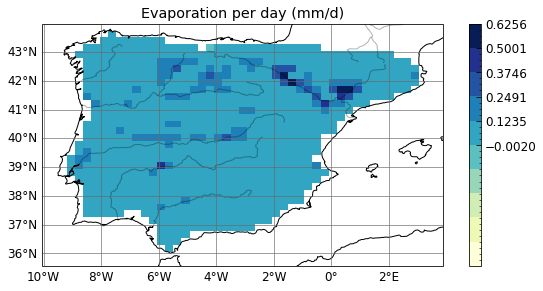

In [223]:
var='evap'
ds=ip_orc_diff
vmin=-0.0
vmax= 1.5
vmin,vmax = None, None
cmap=wet
map_ave(ds, var, vmin=vmin, vmax=vmax, cmap=cmap)

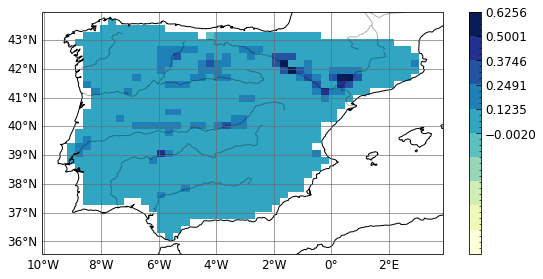

In [224]:
var='evap'
ds=ip_orc_diff_mean
vmin=-0.0
vmax= 1.5
vmin,vmax = None, None
cmap=wet
map_plotvar(ds[var], vmin=vmin, vmax=vmax, cmap=cmap)

In [243]:
#Diff map
var='evap'
ds1=ip_orc_irr
ds2=ip_orc_noirr
vmax= 0.6
vmin=-0.6
# vmin,vmax = None, None
cmap=emb_neutral
pvalue=0.05
sig_method=0
check_norm=False
sig_viz=3

#chose matplotlib hatch styles
mpl.rcParams['hatch.linewidth'] = 0.7
mpl.rcParams['hatch.color'] = 'red'

No significance mask applied


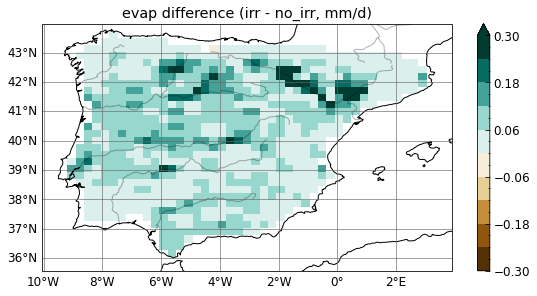

In [231]:
map_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax, cmap=cmap, 
             sig=False)

Significance method 0: two-sample t-test


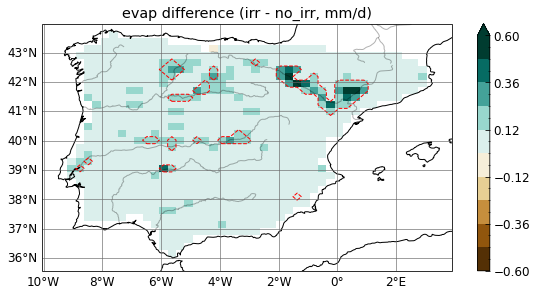

In [244]:
map_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax, cmap=cmap, 
             sig=True, sig_method=sig_method, sig_viz=sig_viz, check_norm=check_norm, pvalue=pvalue, hatch='xxx')

Significance method 0: two-sample t-test


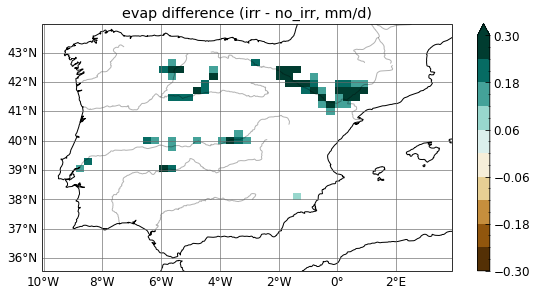

In [233]:
map_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax, cmap=cmap, 
             sig=True, sig_method=sig_method, sig_viz=0, pvalue=pvalue)

In [234]:
brr

NameError: name 'brr' is not defined

In [ ]:
#ttest pvalue plot
var='sens'
max_value=0.2
min_value=0
min_value, max_value= None, None
ds1=lmdz_irr
ds2=lmdz_noirr
p_values = xr.apply_ufunc(
    lambda x, y: ttest_ind(x, y, axis=0, nan_policy='omit').pvalue, 
    ds1[var], ds2[var],
    input_core_dims=[['time'], ['time']],
    output_core_dims=[[]],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float],
    dask_gufunc_kwargs={'allow_rechunk': True}
)
title='pvalues for {}, JJA'.format(var)
map_plotvar(p_values, vmin=min_value, vmax=max_value, cmap=wet,title=title)

In [ ]:
# Display 2 maps of var
var = 'sens'
ds1 = lmdz_irr
ds2 = lmdz_noirr
color_map=reds

map_two_ds(ds1, ds2, var, in_cmap=color_map)

In [ ]:
#Relative diff map
var='sfcWind'
maxvalue=None
ds1=lmdz_irr
ds2=lmdz_noirr

map_rel_diff_ave(ds1, ds2, var, in_vmax=maxvalue)

In [ ]:
#Display map of var for ds on restricted area
var='t2m'
ds = lmdz_noirr
# ds = std
latmin=36.0
latmax=44
lonmin=-10
lonmax=3.5

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var].mean(dim='time')

map_plotvar(plotvar, in_cmap=emb_neutral, in_vmax=None, title=var)

# Time series and seasonnal cycle

Diff (lowirr_irr - lowirr_noirr) : 0.04 (mm/d)
Diff (medirr_irr - medirr_noirr) : 0.08 (mm/d)
Diff (highirr_irr - highirr_noirr) : 0.19 (mm/d)


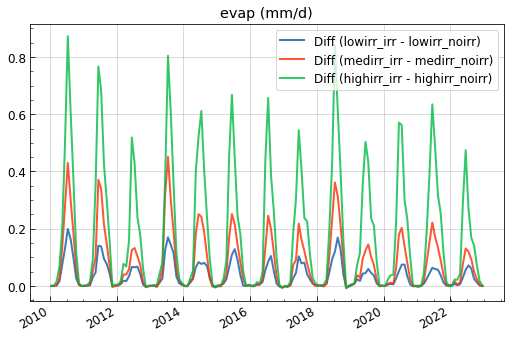

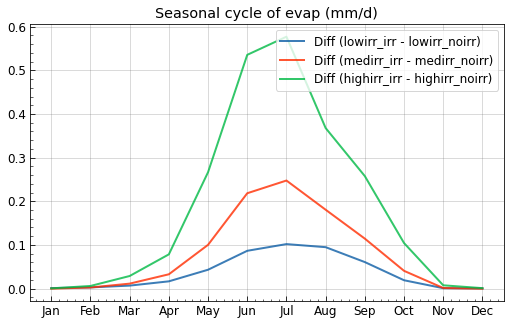

In [129]:
var='evap'

ds1= lowirr_ip_orc_diff
ds2= medirr_ip_orc_diff
ds3=highirr_ip_orc_diff
ds_list=[ds1, ds2, ds3]
# ds_list=[ds1]

year_max=2022
time_series_ave(ds_list, var, year_max=year_max, title='{} ({})'.format(var, ds1[var].attrs['units']))
seasonal_cycle_ave(ds_list, var, year_max=year_max, title='Seasonal cycle of {} ({})'.format(var, ds1[var].attrs['units']))

# Scatter plots

## By grid cell (local recycling)

In [ ]:
var1='irrigation'
ds1=irr_ip_orc_full

var2='runoff'
ds2=irr_ip_orc_diff

title='Annual mean (1 data pt = 1 grid cell)'
# title=None

# scatter_vars(ds1, ds2, var1, var2, reg=True, plot_one=True, title=title)
scatter_annual_mean(ds1, ds2, var1, var2, reg=True, plot_one=True)

In [ ]:
var1='evap'
ds1=ip_lmdz_diff_mean

var2='rain'
ds2=ip_orc_diff_mean

scatter_vars_density(ds1, ds2, var1, var2, reg=True, plot_one=False)

## Spatial aggregation (regional recycling on a given month)

In [ ]:
var1='irrigation'
ds1=ip_orc_full_aggr

var2='s_pblh'
# ds2=ip_orc_diff_aggr
ds2=irr_ip_lmdz_diff_aggr
seasons=['MAM', 'JJA', 'SON']
scatter_vars_seasons(ds1, ds2, var1, var2, reg=True, plot_one=False, coloring=True,
                      is_1D=True, seasons_list=seasons)

In [ ]:
var1='irrigation'
ds1=ip_orc_full_aggr

var2='evap'
ds2=irr_ip_orc_diff_aggr

title='Irrigated areas domain mean (1 data pt = 1 sim month)'
title=None

seasons=['JJA']
months=[6,7,8]
scatter_vars_months(ds1, ds2, var1, var2, reg=True, plot_one=True, is_1D=True, months_list=months, coloring=True, title=title)

# Aggregate values by irrig class (temporal mean and spatial aggr)

In [45]:
recalc_df=False

In [39]:
#irrigation by zone
if recalc_df:
    vars=['irrigation']
    ds_list=[ lowirr_ip_orc_irr_mean, 
            medirr_ip_orc_irr_mean, 
            highirr_ip_orc_irr_mean]

    # irrig_by_zone = compute_means(ds_list, vars)
    irrig_by_zone = build_stats_df(ds_list, vars)
    rename_dict={
                "lowirr_irr":"lowirr",
                "medirr_irr":"medirr",
                "highirr_irr":"highirr"
                }
    irrig_by_zone.rename(index=rename_dict, inplace=True)
    irrig_by_zone.to_csv('irrig_by_zone.csv')
    irrig_by_zone.attrs['name']='Irrigation by zone'
    irrig_by_zone
else:
    pass

In [40]:
#diffs by zone
if recalc_df:
    vars=['evap', 'rain', 'tair', 'runoff', 'mrro']
    ds_list=[ lowirr_ip_orc_diff_mean,
             medirr_ip_orc_diff_mean, 
             highirr_ip_orc_diff_mean]

    diff_by_zone = build_stats_df(ds_list, vars)
    #change name of rows
    rename_dict={
                "lowirr_irr":"lowirr",
                "medirr_irr":"medirr",
                "highirr_irr":"highirr"
                }
    diff_by_zone.rename(index=rename_dict, inplace=True)
    #add all subcolumns of irrigation to diff_by_zone
    diff_by_zone_withirr = pd.concat([diff_by_zone, irrig_by_zone], axis=1)
    #export to csv
    diff_by_zone_withirr.to_csv('figures/diff_by_zone.csv')
    diff_by_zone_withirr.attrs['name']='Diff by zone'
    diff_by_zone.attrs['name']='Diff by zone'
    diff_by_zone_withirr
else:
    # pass
    diff_by_zone_csv=pd.read_csv('figures/diff_by_zone.csv', index_col=0)
    # diff_by_zone_csv.attrs['name']='Diff by zone'
    diff_by_zone_csv

In [47]:
diff_by_zone

evap                             \
                                          mean          std           min   
Diff (lowirr_irr - lowirr_noirr)    0.03623255  0.019506333  -0.001978376   
Diff (medirr_irr - medirr_noirr)     0.0791063  0.018401602   0.036928516   
Diff (highirr_irr - highirr_noirr)  0.18592912    0.1035331    0.08799423   

                                                        rain               \
                                           max          mean          std   
Diff (lowirr_irr - lowirr_noirr)    0.11471746   0.024597201   0.03908978   
Diff (medirr_irr - medirr_noirr)    0.13775332  0.0098611545  0.016265996   
Diff (highirr_irr - highirr_noirr)  0.62562555  0.0106943315  0.013569221   

                                                                       tair  \
                                             min          max          mean   
Diff (lowirr_irr - lowirr_noirr)    -0.029565854    0.2820973  -0.008970232   
Diff (medirr_irr - medirr_noirr)      -0.0344636   0.08586024  -0.018491002   
Diff (highirr_irr - highirr_noirr)  -0.020779459  0.055049445  -0.039973866   

                                                                               \
                                             std           min            max   
Diff (lowirr_irr - lowirr_noirr)    0.0053057307  -0.025252318   0.0023183578   
Diff (medirr_irr - medirr_noirr)     0.004943338   -0.04182023  -0.0074235965   
Diff (highirr_irr - highirr_noirr)   0.023053674   -0.14067645   -0.015692296   

                                          runoff                              \
                                            mean           std           min   
Diff (lowirr_irr - lowirr_noirr)    0.0058893636   0.013948182  -0.009779645   
Diff (medirr_irr - medirr_noirr)    0.0020676346   0.004222354  -0.013286114   
Diff (highirr_irr - highirr_noirr)  0.0024453374  0.0030621248  -0.005950379   

                                                          mrro                 \
                                            max           mean            std   
Diff (lowirr_irr - lowirr_noirr)     0.13521643  1.8651988e-07  4.3027137e-07   
Diff (medirr_irr - medirr_noirr)    0.032647412  2.4628587e-08  1.2112262e-07   
Diff (highirr_irr - highirr_noirr)  0.011604741  4.9036983e-09  1.0132967e-07   

                                                                  
                                               min           max  
Diff (lowirr_irr - lowirr_noirr)    -2.0097627e-07  3.216042e-06  
Diff (medirr_irr - medirr_noirr)    -2.6054067e-07  7.958896e-07  
Diff (highirr_irr - highirr_noirr)  -2.1057144e-07  5.858274e-07

In [ ]:
print(diff_by_zone)

Text(0.5, 1.0, 'evap diff vs irrigation for different irrigation zones')

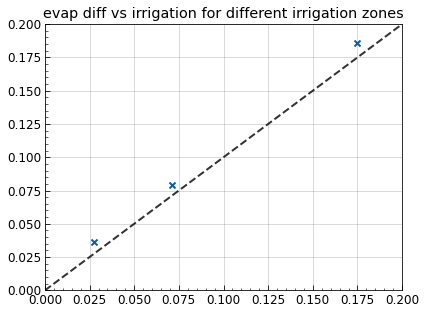

In [177]:
#scatter plot diff of evap on y axis with irrigation on x axis for all 3 diff datasets
var='evap'
var1=irrig_by_zone["irrigation"]['mean']
var2=diff_by_zone["evap"]['mean']
var3=diff_by_zone["rain"]['mean']
var4=diff_by_zone["tair"]['mean']
xmin=0
xmax=0.2
ymin=0
ymax=0.2
# plt.scatter(var1, var2)
plt.scatter(var1, diff_by_zone[var]['mean'])
plt.xlim(xmin, xmax)  # Set x-axis limits
plt.ylim(ymin, ymax)  # Set y-axis limits

# plt.scatter(var1, diff_by_zone[var]['min'], vmin=ymin, vmax=ymax)
# plt.scatter(var1, diff_by_zone[var]['max'], vmin=ymin, vmax=ymax)
#plot 1:1 line
plt.plot([0, 0.2], [0, 0.2], color='black', linestyle='--')
title='{} diff vs irrigation for different irrigation zones'.format(var)
plt.title(title)

In [188]:
import matplotlib.pyplot as plt
import numpy as np

def plot_variable_boxplots(data, variable, irrigation_means):
    """
    Creates boxplots for a given variable, positioned on the x-axis according to irrigation mean values.

    Args:
    - data: pd.DataFrame, DataFrame containing rows for datasets (e.g., lowirr, medirr, highirr) 
            and subcolumns with statistics (mean, min, max, std) for various variables.
    - variable: str, the name of the variable to plot (e.g., 'evap', 'rain', 'tair').
    - irrigation_means: list, the mean irrigation values corresponding to the datasets.

    Returns:
    - A matplotlib figure and axis with the plot.
    """
    # Extract the relevant statistics for the variable
    stats = data[variable]

    fig, ax = plt.subplots(figsize=(8, 6))
    box_width = 0.01
    # Loop over datasets and plot individual boxes
    for idx, (irrigation_mean, row) in enumerate(zip(irrigation_means, stats.iterrows())):
        dataset_name, row_data = row
        min_val = row_data['min']
        max_val = row_data['max']
        mean_val = row_data['mean']
        std_dev = row_data['std']

        # Box components
        lower_whisker = min_val
        lower_box = mean_val - std_dev
        upper_box = mean_val + std_dev
        upper_whisker = max_val

        # Create the box and whiskers at the specified x position (irrigation_mean)
        ax.plot([irrigation_mean, irrigation_mean], [lower_whisker, lower_box], color='black', linestyle='-')  # Lower whisker
        ax.plot([irrigation_mean, irrigation_mean], [upper_box, upper_whisker], color='black', linestyle='-')  # Upper whisker
        ax.plot([irrigation_mean - box_width / 4, irrigation_mean + box_width / 4], [lower_whisker, lower_whisker], color='black', linewidth=1)  # Min (horizontal bar)
        ax.plot([irrigation_mean - box_width / 4, irrigation_mean + box_width / 4], [upper_whisker, upper_whisker], color='black', linewidth=1)  # Max (horizontal bar)

        ax.plot([irrigation_mean], [mean_val], 'r+')  # Mean value (red dot)
        # ax.plot([irrigation_mean - box_width / 2, irrigation_mean + box_width / 2], [mean_val, mean_val], color='red', linewidth=2)  # Mean value (red bar)

        ax.add_patch(plt.Rectangle((irrigation_mean - 0.005, lower_box), box_width, upper_box - lower_box, 
                                    color='lightblue', alpha=0.5, edgecolor='black'))  # Box

    # Customize plot appearance
    ax.set_xlabel("Irrigation Mean (mm/d)", fontsize=12)
    ax.set_ylabel(f"{variable} diff (irr-no_irr)", fontsize=12)
    ax.set_title(f"Boxplots of {variable} diff for 3 irrigation classes", fontsize=14)
    plt.xticks(fontsize=10)
    plt.tight_layout()

    return fig, ax



In [151]:
irrigation_means = irrig_by_zone["irrigation"]['mean'].values
irrigation_means

array([array(0.02752122, dtype=float32), array(0.07120309, dtype=float32),
       array(0.17477915, dtype=float32)], dtype=object)

/tmp/ipykernel_13172/2076405844.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((irrigation_mean - 0.005, lower_box), box_width, upper_box - lower_box,


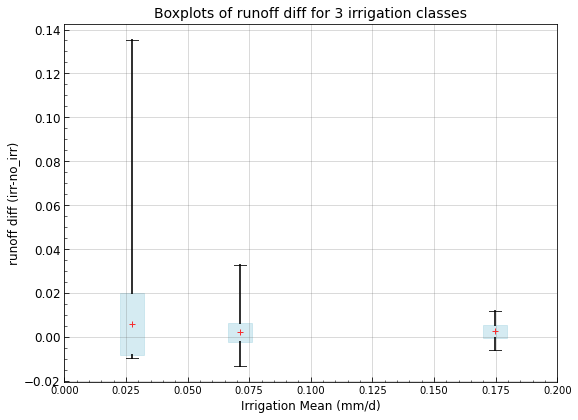

In [196]:
fig, ax = plot_variable_boxplots(diff_by_zone, 'runoff', irrigation_means)
#add 1:1 line
# plt.plot([0, 0.2], [0, 0.2], color='black', linestyle='--')
plt.xlim(0, 0.2)
plt.show()

KeyError: 'name'

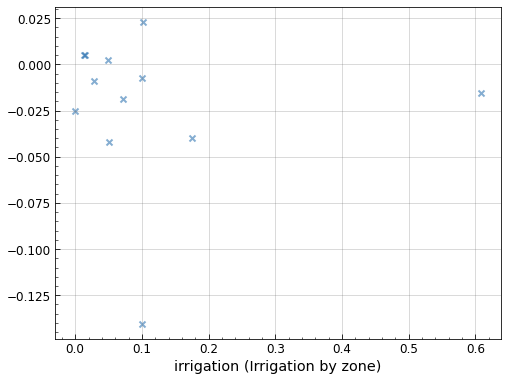

In [42]:
ds1=irrig_by_zone
ds2=diff_by_zone
var1='irrigation'
var2='tair'
vmin=0
vmax=0.2
scatter_vars(ds1, ds2, var1, var2, reg=False, plot_one=False, title=title)